## **ML-Model to detect gender age based on his/her voice**   
In this notebook, I am using a common-voice dataset to train a model for detecting age of 
a person based on his/her voice

### **Stepwise ML-model development**  
This notebook is created for beginners to develop age detection ml-model with stepwise approach using common-voice dataset.
The notebook include following steps:
* Data Collection
* Data Pre-processing 
* Feature Engineering
* Model Selection
* Model Analysis
* Model Deployment

### **Step-01 Data Collection**  
In this step the data is loaded and explored. The data is understood with basic graphs and to check if the dataset is balanced.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns # visualizing data with stunning default theme
import sklearn # contain algorithms
import warnings

from toolz.curried import unique

warnings.filterwarnings('ignore')

merge_gen_age = False
df = pd.read_csv("helper.csv")
df['gender'] = df['gen_age'].apply(lambda x: "male" if x[0] == "m" else "female")
df['age'] = df['gen_age'].apply(lambda x: x.split("male")[1])
df.drop(['gen_age'], axis=1, inplace=True)
print(len(df))

54421


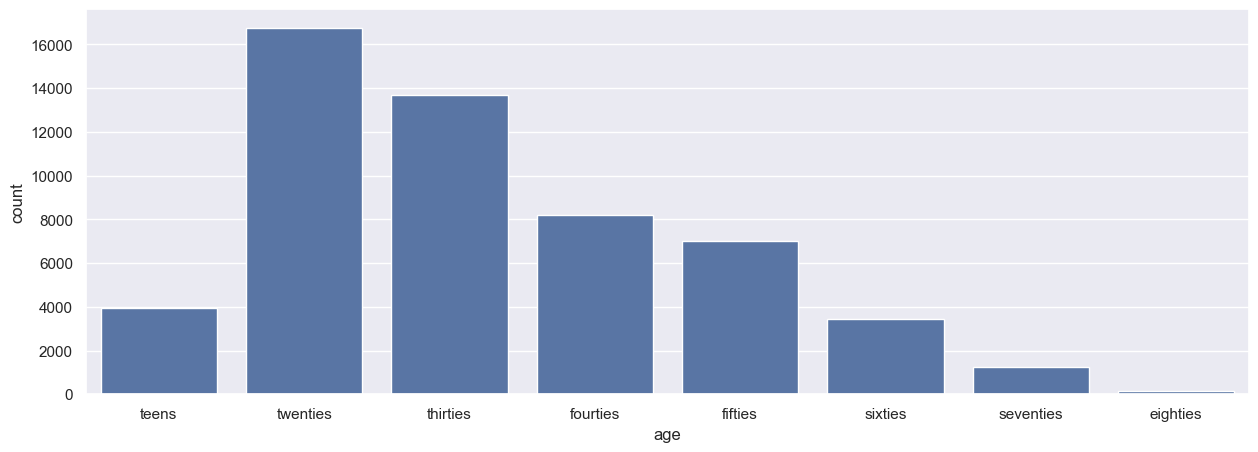

In [2]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.countplot(x="age", 
        data=df[df['age'].notna()], 
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()


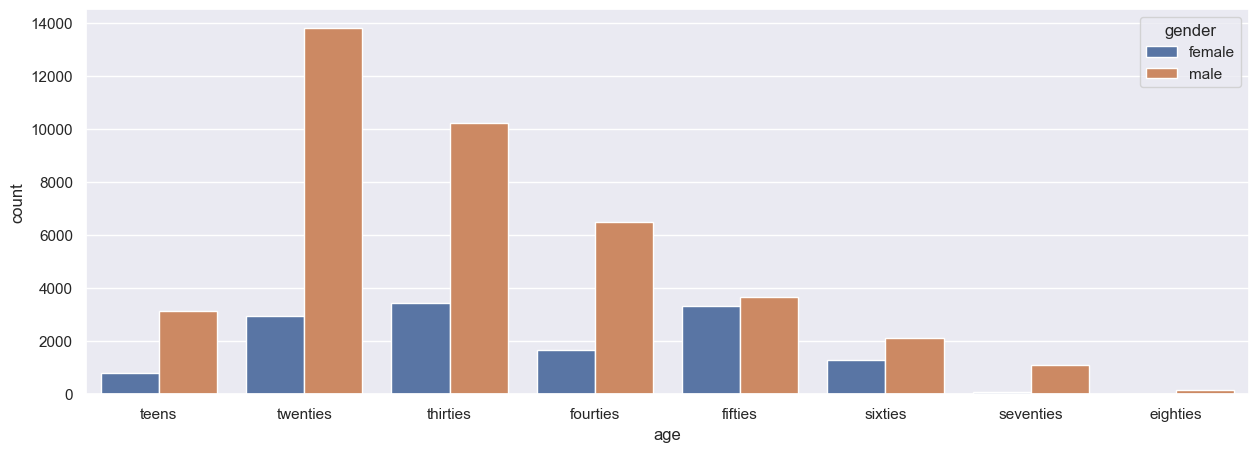

In [3]:
sns.countplot(x="age", 
        hue='gender',
        data=df[df['age'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

initial: (54421, 25) final: (54421, 25)


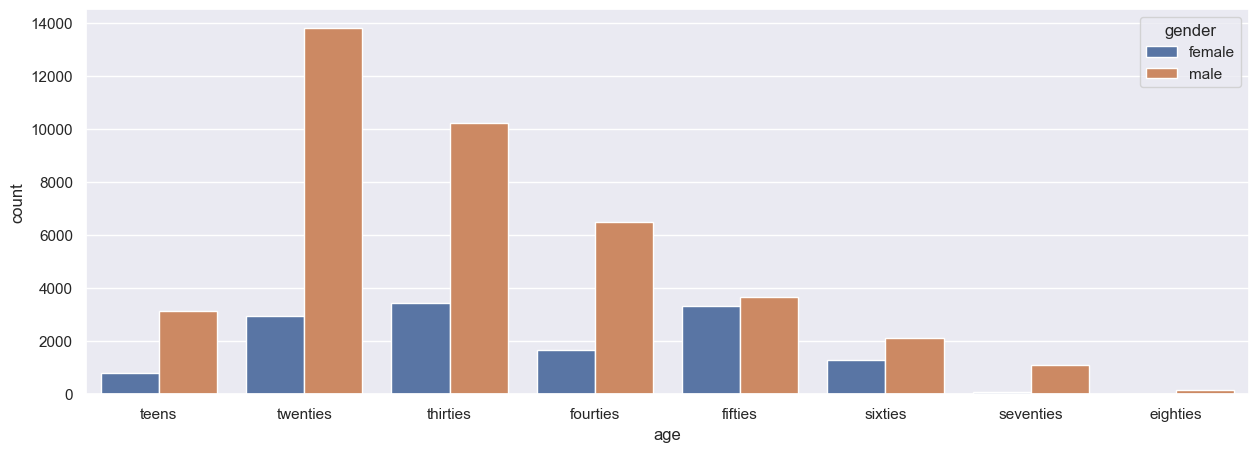

In [4]:
#del df['duration']
start=df.shape
#df.isna().sum()
end = df[df['age'].notna()].shape
print("initial: {} final: {}".format(start, end))
sns.countplot(x="age", 
        hue='gender',
        data=df[df['age'].notna()& df['gender'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

#### **First-step findings**
We understood the dataset and also found that the dataset is imbalance. To refine the dataset for ml-model, we need to perform pre-processing in next-step.

### Data Pre-processing  
#### Data Cleaning  
In this step we drop entries(samples) with NaN values. The columns that doesn't contribute(unnecessary) to the model are removed. The attributes are checked for its datatypes and changed to an approapriate type.

In [5]:
#we extract the columns that we think useful are
#To clean the data we remove the sample with NaN attribute values.
data = df[df['age'].notna() & df['gender'].notna()]
data.reset_index(inplace=True, drop=True)
data.head()

,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,gender,age
0,2825.306152,3928.282715,995.014587,-436.778717,118.968239,-14.128235,24.775040,30.152925,-16.367733,-13.281313,...,-9.980342,-12.686896,-11.602407,-4.087377,-4.877973,-4.113841,-2.776024,-7.661256,female,twenties
1,3195.045654,3484.965576,2800.683105,-266.753143,112.832596,-36.567936,11.823296,-25.162973,10.599191,-9.991164,...,-1.595940,4.655742,-1.429575,-3.109938,-10.778062,-6.814103,-11.005450,-0.427549,male,seventies
2,2507.562988,3226.625000,1773.509766,-237.324280,153.644897,-65.016083,-26.214598,30.117559,-13.242214,-23.214937,...,-10.257278,-7.798924,-9.287923,-3.678131,-1.330194,-8.286107,-7.717228,-4.699667,female,thirties
3,2822.562256,3889.874023,1171.804565,-279.279266,120.374969,7.061306,21.554234,12.693099,-1.403449,-17.706833,...,-5.141526,-1.376988,-7.463969,-6.185144,-0.798491,-7.824570,-11.113800,-1.442696,male,sixties
4,2890.035889,3998.354980,1209.936035,-131.543152,141.066132,-4.911656,60.172916,-30.647327,30.953108,-4.356675,...,6.442781,-6.174723,5.000870,-5.391839,2.402710,-4.468313,0.118594,2.645845,male,fifties


In [6]:
#data['gender'] = pd.to_numeric(data['gender'],errors = 'coerce')
#data.dtypes
#if the below code fail to covert gender datatype and values then uncomment above code
cleanup_nums = {"gender": {"male":1,"female":0,"other":0.5}}
data = data.replace(cleanup_nums)
data.head()

,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,gender,age
0,2825.306152,3928.282715,995.014587,-436.778717,118.968239,-14.128235,24.775040,30.152925,-16.367733,-13.281313,...,-9.980342,-12.686896,-11.602407,-4.087377,-4.877973,-4.113841,-2.776024,-7.661256,0,twenties
1,3195.045654,3484.965576,2800.683105,-266.753143,112.832596,-36.567936,11.823296,-25.162973,10.599191,-9.991164,...,-1.595940,4.655742,-1.429575,-3.109938,-10.778062,-6.814103,-11.005450,-0.427549,1,seventies
2,2507.562988,3226.625000,1773.509766,-237.324280,153.644897,-65.016083,-26.214598,30.117559,-13.242214,-23.214937,...,-10.257278,-7.798924,-9.287923,-3.678131,-1.330194,-8.286107,-7.717228,-4.699667,0,thirties
3,2822.562256,3889.874023,1171.804565,-279.279266,120.374969,7.061306,21.554234,12.693099,-1.403449,-17.706833,...,-5.141526,-1.376988,-7.463969,-6.185144,-0.798491,-7.824570,-11.113800,-1.442696,1,sixties
4,2890.035889,3998.354980,1209.936035,-131.543152,141.066132,-4.911656,60.172916,-30.647327,30.953108,-4.356675,...,6.442781,-6.174723,5.000870,-5.391839,2.402710,-4.468313,0.118594,2.645845,1,fifties


### **Feature Engineering**
#### **Feature Extraction**

We extract the following features:  
The following features are related to audio quality through which the model will learn more effectively. In this project it is not necessary to have good knowledge about the given audio features.
**Gender**
* **Spectral Centroid**: each frame of a magnitude spectrogram is normalized and treated as a distribution over frequency bins, from which the mean (centroid) is extracted per frame
* **Spectral Bandwidth**: compute 2nd-order spectral bandwidth
* **Spectral Rolloff**: the center frequency for a spectrogram bin such that at least roll_percent (0.85 by default) of the energy of the spectrum in this frame is contained in this bin and the bins below
* **Mel Frequency Cepstral Coefficients (MFCCs)**: a small set of 20 features that describe the overall shape of a spectral envelope

**Librosa package**  
Librosa is a Python package for music and audio analysis. It provides the building blocks necessary to create the music information retrieval systems. Librosa helps to visualize the audio signals and also do the feature extractions in it using different signal processing techniques.

In [7]:
df_features = data.copy()
df_features['gender'] = df_features['gender'].map({
    1 : "male",
    0 : "female",
    0.5 : "other"
})
if (merge_gen_age):
    df_features['gen_age'] = df_features['gender'] + ", " + df_features['age']
    df_features.drop(['gender'], axis = 1, inplace= True)
    df_features.drop(['age'], axis=1, inplace=True)
    df_features = df_features[~(df_features['gen_age'].str.contains('other'))]
else:
    # swap gender to int using lambda function to check if male or female
    df_features['gender'] = df_features['gender'].apply(lambda x: 1 if x == 'male' else 0)

df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54421 entries, 0 to 54420
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   spectral_centroid   54421 non-null  float64
 1   spectral_bandwidth  54421 non-null  float64
 2   spectral_rolloff    54421 non-null  float64
 3   mfcc1               54421 non-null  float64
 4   mfcc2               54421 non-null  float64
 5   mfcc3               54421 non-null  float64
 6   mfcc4               54421 non-null  float64
 7   mfcc5               54421 non-null  float64
 8   mfcc6               54421 non-null  float64
 9   mfcc7               54421 non-null  float64
 10  mfcc8               54421 non-null  float64
 11  mfcc9               54421 non-null  float64
 12  mfcc10              54421 non-null  float64
 13  mfcc11              54421 non-null  float64
 14  mfcc12              54421 non-null  float64
 15  mfcc13              54421 non-null  float64
 16  mfcc

### **Feature Transformation**  

Scaling the features with the scikit-learn StandardScaler.

In [8]:
from sklearn.preprocessing import StandardScaler


def scale_features(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(np.array(data.iloc[:, 0:-1], dtype = float))
    # with data.iloc[:, 0:-1] we don't consider the label column
        
    return scaled_data, scaler

x, scaler = scale_features(df_features)

In [9]:
print("Before scaling:", df_features.iloc[0].values[:-1])
print("\nAfter scaling:", x[0])

Before scaling: [2825.30615234375 3928.28271484375 995.0145874023438 -436.7787170410156
 118.9682388305664 -14.12823486328125 24.77503967285156 30.152925491333008
 -16.367733001708984 -13.281312942504885 -9.905285835266112
 -24.430831909179688 -13.025938987731934 -6.231024265289307
 -12.565613746643066 -9.980341911315918 -12.686896324157717
 -11.60240650177002 -4.087377071380615 -4.877972602844238
 -4.113840579986572 -2.776024103164673 -7.661256313323975 0]

After scaling: [-0.60289237  0.49006454 -1.21210812 -2.0421236   0.30699294  0.18858136
  0.04014235  1.79461519 -1.11080057 -0.3182037  -0.11710998 -1.53242461
 -0.40431229 -0.28325175 -0.63224147 -1.39425642 -1.32291932 -1.12985473
 -0.03709905 -0.1606341   0.19419251  0.12622081 -1.1959464  -1.73147811]


In [10]:
from sklearn.preprocessing import LabelEncoder

def get_labels(data):
    labels = data.iloc[:, -1]
    encoder = LabelEncoder()
    labels = encoder.fit_transform(labels)
    return labels, encoder

y, encoder = get_labels(df_features)
classes = encoder.classes_
print("Before encoding:", df_features.iloc[0].values[-1])
print("\nAfter encoding:", y[0])
print("\nClasses:", classes)

Before encoding: twenties

After encoding: 7

Classes: ['eighties' 'fifties' 'fourties' 'seventies' 'sixties' 'teens' 'thirties'
 'twenties']


### **Feature Selection**  

We use the ANOVA (ANalysis Of VAriance) statistical technique (f_classif) to select the best 22 features.


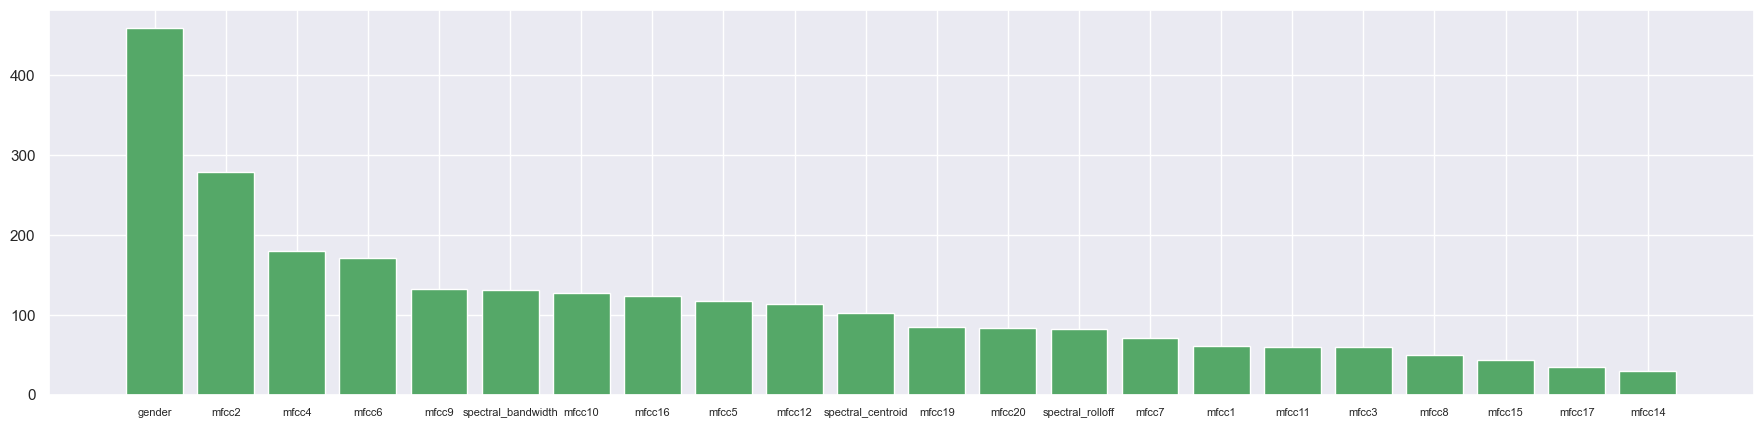

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

n_features = 22

f_selector = SelectKBest(f_classif, k=n_features).fit(x, y)
X_new = f_selector.transform(x)
scores = f_selector.scores_

indices = np.argsort(scores)[::-1]

features = []
for i in range(n_features):
    features.append(df_features.columns[indices[i]])
    
plt.figure(figsize=(22, 5))
plt.bar(features, scores[indices[range(n_features)]], color='g')
plt.xticks(fontsize=8)
plt.show()


### **Model Selection**  

Here, we consider two classifiers:

    Support Vector Machine
    Random Forest

We evaluate them with the K-Fold Cross-Validation technique. At each iteration of this outer cross-validation process, we tune the hyper-parameters of the classifiers with another (inner) Cross-Validation process , that will further divide the training set into training and validation data.

At each iteration of the outer CV process, we print the F1-Score obtained by the tuned classifier on the validation data, but also the F1-Score computed on the test data. Finally, we print the average F1-Scores computed on the test data at each step of the outer CV process.

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from Linear_Model_Tree import LinearModelTree

### Train Base Classifiers

In [13]:
X_no_gender = X_new[:, :-1]
no_gender = False;

In [14]:
if (no_gender):
    X_train, X_test, y_train, y_test = train_test_split(X_no_gender, y, test_size = 0.2, random_state=42)
else:
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state=42)
print(np.unique(X_train[:, -1], return_counts=True))
a = np.unique(X_train[:, -1])[0]
b = np.unique(X_train[:, -1])[1]

# Get indices for each gender
idx_a = np.where(X_train[:, -1] == a)[0]
idx_b = np.where(X_train[:, -1] == b)[0]

# Combine indices
selected_indices = np.concatenate((idx_a, idx_b))

# Subset data
X_train_selected = X_train[selected_indices]
y_train_selected = y_train[selected_indices]

X_train = X_train_selected
y_train = y_train_selected


(array([-1.73147811,  0.57754123]), array([10949, 32587]))


In [15]:
## test decision tree using gridsearch
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt_model = DecisionTreeClassifier()
dt_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4]
}
dt_cv = GridSearchCV(dt_model,
            param_grid = dt_grid,
            cv = 5,
            n_jobs=-1
)
dt_cv.fit(X_train, y_train)
best_dt = dt_cv.best_estimator_

In [16]:
print("Best parameters found: ", dt_cv.best_params_)
print("Best cross-validation score: ", dt_cv.best_score_)
test_score = best_dt.score(X_test, y_test)
print("Test set accuracy: ", test_score)

Best parameters found:  {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best cross-validation score:  0.3425690969609877
Test set accuracy:  0.3930179145613229


LINEAR MODEL TREE TRIAL

In [ ]:
from sklearn import clone
from Bagging import Bagging
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
best_model_LMT = None
best_params = None
accuracy = -1
for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    # Fit the model on the training fold
    model_small = LinearModelTree(base_model=SVC(C=100, gamma=0.01, kernel='rbf', probability=True), split_policy='Accuracy', split_model=GaussianNB(), max_depth=6, min_samples_leaf=5, min_samples_split=10)
    model = Bagging(model_small, n_estimators=50, max_samples=0.7, random_state=42)
    model.fit(X_train_fold, y_train_fold)
    acc = model.score(X_test_fold, y_test_fold)
    print("training acc:" , model.score(X_train_fold, y_train_fold))
    print("Accuracy: ", acc)
    ## 0.8 max sample, 10 n_estimatiors => 0.9 , 0.78
    ## 0.6, 50 n_estimatiors => 0.87, 0.77
    ## 0.8, 10 estimators, c 1000 => 0.96, 0.8
    ## 0.7, 50 estimators, c 1000 => 0.96, 0.8
    if acc > accuracy:
        accuracy = acc
        best_model_LMT = model

In [53]:
 knn_model = KNeighborsClassifier()
knn_grid = {
    'n_neighbors': list(range(1, 27)),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn_cv = GridSearchCV(knn_model,
            param_grid = knn_grid,
            cv = 5,
            n_jobs=-1
)

knn_cv.fit(X_train, y_train)
best_knn = knn_cv.best_estimator_

In [54]:
print("Best parameters found: ", knn_cv.best_params_)
print("Best cross-validation score: ", knn_cv.best_score_)

test_score = best_knn.score(X_test, y_test)
print("Test set accuracy: ", test_score)

Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 1}
Best cross-validation score:  0.8062362771383528
Test set accuracy:  0.9009646302250803


In [55]:
svc_model = SVC(probability=True)
svc_grid = {
    'C': [1000],
    'gamma': [0.01],
    'kernel': ['rbf']
}
svc_cv = GridSearchCV(svc_model,
            param_grid = svc_grid,
            cv = 5,
            n_jobs=-1
)

svc_cv.fit(X_train, y_train)
best_svc = svc_cv.best_estimator_

In [56]:
print("Best parameters found: ", svc_cv.best_params_)
print("Best cross-validation score: ", svc_cv.best_score_)

test_score = best_svc.score(X_test, y_test)
print("Test set accuracy: ", test_score)

Best parameters found:  {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score:  0.7066404076488175
Test set accuracy:  0.8065227377124483


In [57]:
rf_model = RandomForestClassifier()
rf_grid = {
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [100, 300, 500, 700]
}
rf_cv = GridSearchCV(rf_model, 
            param_grid = rf_grid,
            cv = 5,
            n_jobs=-1
)

rf_cv.fit(X_train, y_train)
best_rf = rf_cv.best_estimator_

In [58]:
print("Best parameters found: ", rf_cv.best_params_)
print("Best cross-validation score: ", rf_cv.best_score_)

test_score = best_rf.score(X_test, y_test)
print("Test set accuracy: ", test_score)

Best parameters found:  {'max_features': 'sqrt', 'n_estimators': 300}
Best cross-validation score:  0.6729440364430987
Test set accuracy:  0.7921910886541111


In [59]:
et_model = ExtraTreesClassifier()
et_grid = {
    'max_features': [3, 5, 7, 9, 11],
    'n_estimators': list(range(100, 1100, 100))
}
et_cv = GridSearchCV(et_model, 
            param_grid = et_grid,
            cv = 5,
            n_jobs=-1
)

et_cv.fit(X_train, y_train)
best_et = et_cv.best_estimator_

In [60]:
print("Best parameters found: ", et_cv.best_params_)
print("Best cross-validation score: ", et_cv.best_score_)

test_score = best_et.score(X_test, y_test)
print("Test set accuracy: ", test_score)

Best parameters found:  {'max_features': 11, 'n_estimators': 1000}
Best cross-validation score:  0.7153001594976433
Test set accuracy:  0.8309600367478182


In [61]:

base_estimators = [
    ('knn', best_knn),
    #('logreg', best_lr),   // not good anyways, didnt converge
    ('rf', best_rf),
    ('et', best_et),
    ('svc', best_svc),
    ('lmt', best_model_LMT),
]

meta_classifier = LogisticRegression(max_iter=1000)
stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=meta_classifier,
    cv=5, 
    stack_method='auto',  
    n_jobs=-1  
)
stacking_clf.fit(X_train, y_train)

TypeError: Cannot clone object '<Bagging.Bagging object at 0x167190470>' (type <class 'Bagging.Bagging'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [51]:
test_score = stacking_clf.score(X_test, y_test)
print("Test set accuracy: ", test_score)
#### PREVIOUS WAS 0.907 before TLM shof b3d TLM

Test set accuracy:  0.9071198897565457
